In [1]:
import os
from google.colab import drive

from PIL import Image
from IPython.display import display

# Configuración de google drive

In [2]:
# Montar google drive
drive.mount('/content/drive')

# Cambiar de directorio raiz
ROOT_DIR = '/content/drive/MyDrive/mole-mapper'
os.chdir(ROOT_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Entrenamiento con YOLO

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO

#Carga modelo pre-entrenado para detección
model = YOLO("yolov8n.pt")

#Entrena el modelo
results = model.train(data=os.path.join(ROOT_DIR, "config-moles.yaml"), epochs=200)

# Métricas del modelo

In [3]:
runs_path = os.path.join(ROOT_DIR, 'runs/detect/train')

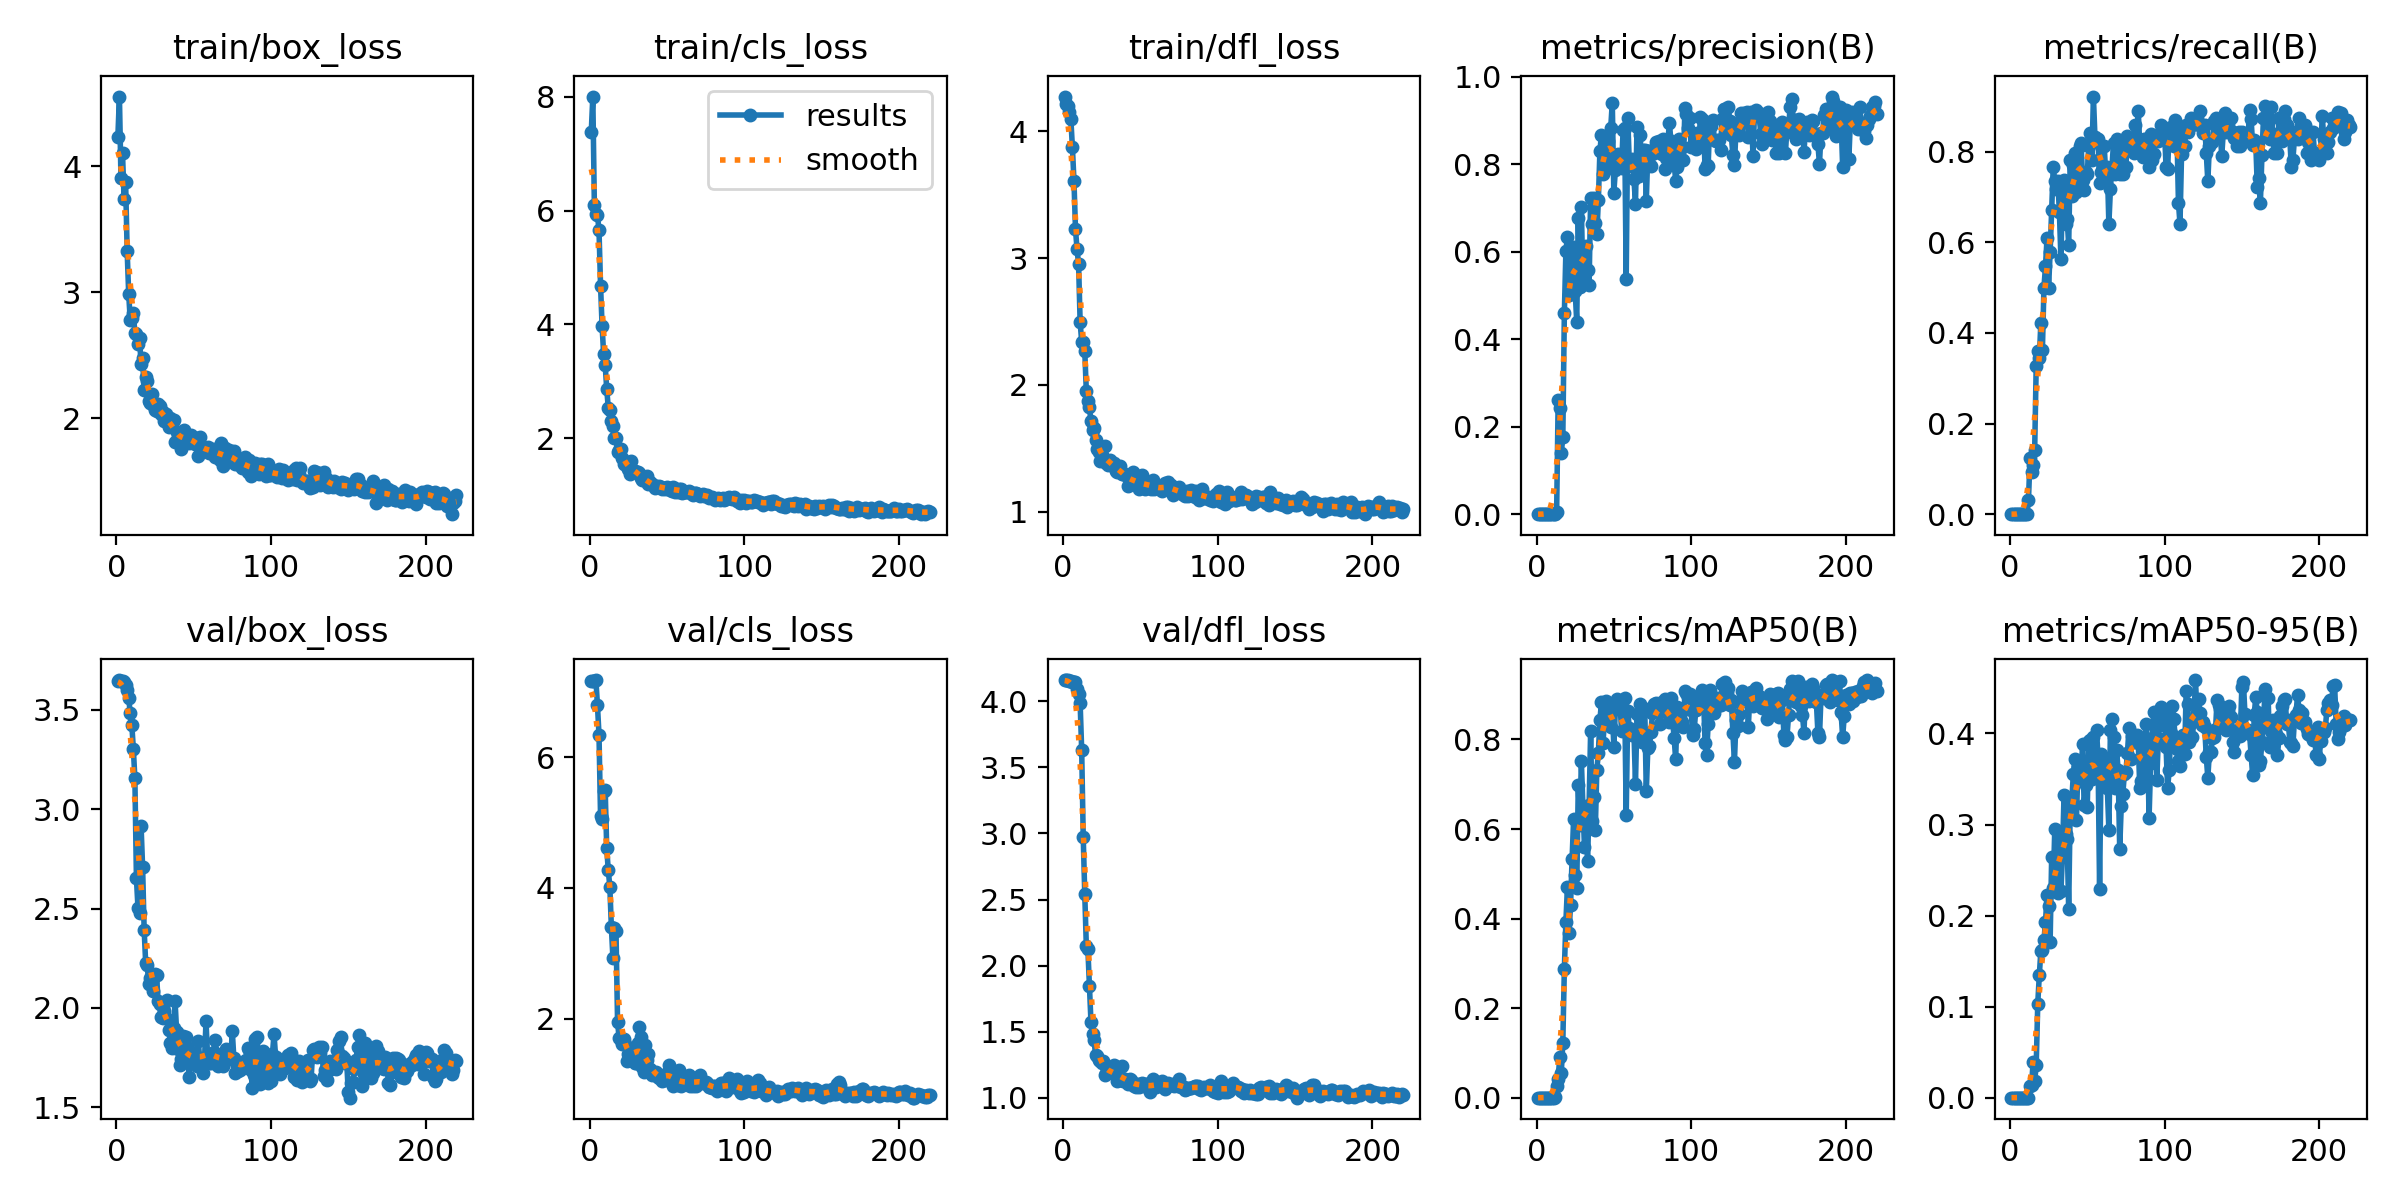

In [4]:
results_path = os.path.join(runs_path, 'results.png')

img = Image.open(results_path)
img = img.resize((2400, 1200))
display(img)

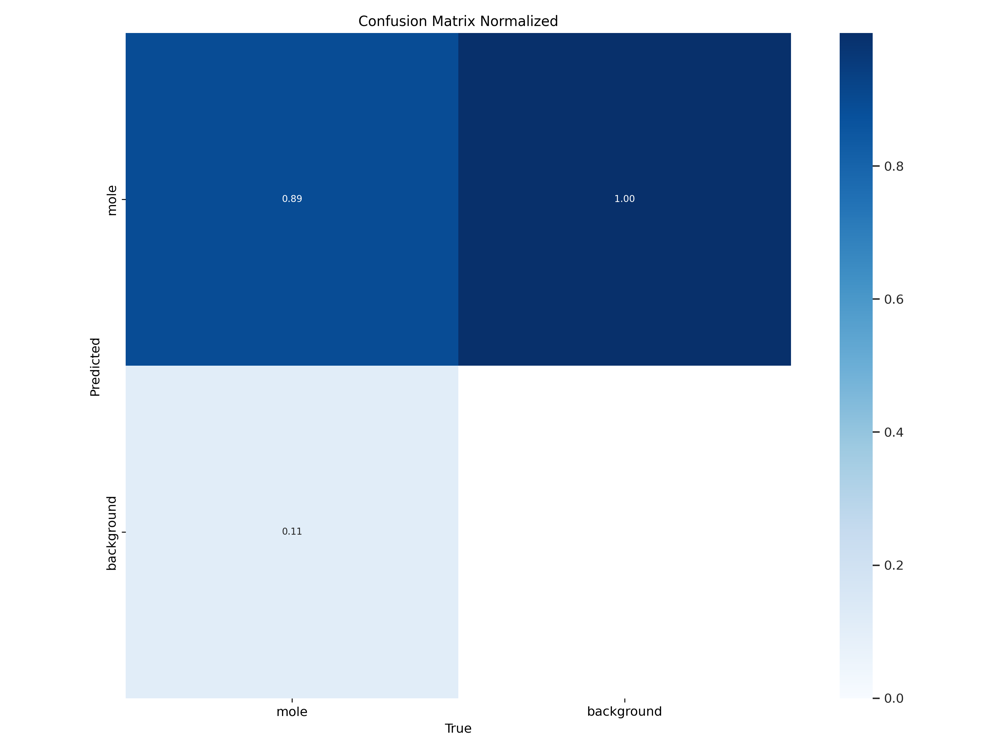

In [5]:
confusion_path = os.path.join(runs_path, 'confusion_matrix_normalized.png')

img = Image.open(confusion_path )
img = img.resize((1000, 750))
display(img)

In [22]:
val_batch0_labels_path = os.path.join(runs_path, 'val_batch0_labels.jpg')

img = Image.open(val_batch0_labels_path)
img = img.resize((1920, 1920))
display(img)